In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pickle
import os
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
import warnings
import joblib

warnings.filterwarnings('ignore')


In [6]:
index_names = ['unit_number', 'time_cycles'] #Unit number = SERIAL_NUMBER
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [152]:
dftrain = pd.read_csv('../CMAPSSData/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('../CMAPSSData/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('../CMAPSSData/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(13096, 26)

In [153]:
train = dftrain.copy()
valid = dfvalid.copy()

In [15]:
valid

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [12]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (13096, 26)
Percentage of the validation dataset :  0.3882942449669404


In [16]:
print('Total None values in the train dataset : ',train.isna().sum())


Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [17]:
print('Total None values in the train dataset : ',valid.isna().sum())


Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [20]:
train[['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [21]:
train.loc[:, "s_1":].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [ ]:
life_var = train.groupby('unit_number')['time_cycles'].max()
plt.figure(figsize=(20,50))

life_var.plot(kind='barh')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.show()

Text(0.5, 1.0, 'Distribution of Time Cycles: Train vs Validation')

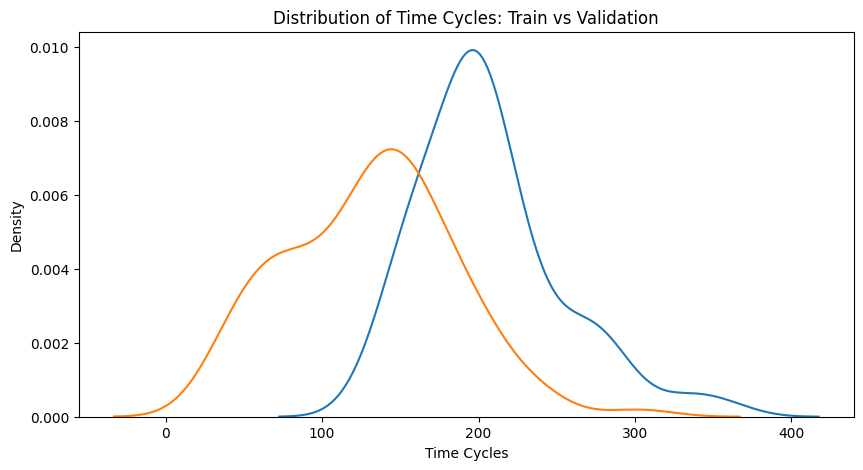

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(life_var)
sns.kdeplot(valid.groupby('unit_number')['time_cycles'].max())
plt.xlabel('Time Cycles')
plt.title('Distribution of Time Cycles: Train vs Validation')


In [154]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [155]:
train = add_RUL_column(train)


In [124]:
train.groupby('unit_number').max()

,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
unit_number,,,,,,,,,,,,,,,,,,,,,
1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,21.61,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,21.61,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,21.61,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,21.61,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,21.61,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,0.0049,0.0005,100.0,518.67,644.20,1608.62,1432.65,14.62,21.61,...,2388.28,8146.04,8.5615,0.03,398,2388,100.0,39.18,23.5344,335
97,202,0.0050,0.0006,100.0,518.67,643.97,1610.66,1430.66,14.62,21.61,...,2388.17,8270.91,8.5596,0.03,400,2388,100.0,39.22,23.5181,201
98,156,0.0077,0.0004,100.0,518.67,644.39,1606.24,1432.16,14.62,21.61,...,2388.30,8156.01,8.5308,0.03,396,2388,100.0,39.30,23.5461,155


In [ ]:
rul_corr = train.corr()['RUL'].sort_values(ascending=False)

# Crear figura
plt.figure(figsize=(10, 12))

# Heatmap vertical
sns.heatmap(rul_corr.to_frame(),
            annot=True,
            fmt='.3f',
            cmap='RdYlGn',        # Rojo (negativo) → Amarillo → Verde (positivo)
            center=0,
            linewidths=1,
            cbar_kws={"label": "Correlation with RUL"})

plt.title('Feature Correlation with RUL (Remaining Useful Life)',
          fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [156]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [ ]:
df_plot = train.sort_values(['unit_number', 'time_cycles'])
#print(df_plot)
graph = sns.PairGrid(data=train, x_vars="RUL", y_vars= setting_names + sensor_names, hue="unit_number", height=4, aspect=6,)
graph = graph.map(plt.plot, alpha=0.5)
graph = graph.set(xlim=(df_plot['RUL'].max(),df_plot['RUL'].min()))
graph = graph.add_legend()

In [ ]:
n_sensors = len(sensor_names)
n_cols = 3
n_rows = int(np.ceil(n_sensors / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_names):
    ax = axes[idx]

    # Boxplot
    bp = ax.boxplot(train[sensor].dropna(),
                    patch_artist=True,
                    notch=True)

    # Colorear
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][0].set_alpha(0.6)

    # Configurar
    ax.set_title(sensor, fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xticklabels([''])


In [157]:
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [158]:
scaler = MinMaxScaler()

X_train = X_train.drop(columns=['RUL'])
X_test = X_test.drop(columns=['RUL'])
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
X_valid_s = scaler.transform(X_valid)


In [ ]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

### Tipo 1: Predecir RUL en cualquier punto del tiempo
### Tipo 2: Predecir RUL solo en el último momento antes de falla - Usamos tipo dos valid.groupby('unit_number').last()



In [100]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [101]:
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [136]:
lr= LinearRegression() #Instantiation
lr.fit(X=X_train_s, y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:44.79941023331309, R2:0.583093872579288
test set RMSE:44.386478219983914, R2:0.5698693780582695
valid set RMSE:32.21308464708069, R2:0.3990960160049226


In [137]:
## Pipeline
lr_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

In [138]:
lr_pipe.fit(X_train, y_train)
# Train
y_lr_train = lr_pipe.predict(X_train)
evaluate(y_train, y_lr_train, label="train")

# Test
y_lr_test = lr_pipe.predict(X_test)
evaluate(y_test, y_lr_test, label="test")

# Validation
y_lr_valid = lr_pipe.predict(X_valid)
evaluate(y_valid, y_lr_valid, label="valid")


train set RMSE:44.79941023331309, R2:0.583093872579288
test set RMSE:44.386478219983914, R2:0.5698693780582695
valid set RMSE:32.21308464708069, R2:0.3990960160049226


In [106]:
# with open("../Models/linear_regression_rul.pkl", "wb") as f:
#     pickle.dump(lr, f)

In [112]:
joblib.dump(lr, "../Models/linear_regression_rul.joblib")

['../Models/linear_regression_rul.joblib']

In [109]:
joblib.dump(scaler, "../Models/feature_scaler.joblib")


['../Models/feature_scaler.joblib']

In [114]:
lr = joblib.load("../Models/linear_regression_rul.joblib")
print(type(lr))
print(lr)


<class 'sklearn.linear_model._base.LinearRegression'>
LinearRegression()


In [139]:
joblib.dump(lr_pipe, "../Models/lr_rul_pipeline.joblib")


['../Models/lr_rul_pipeline.joblib']